<a href="https://colab.research.google.com/github/rimchristian/sales-prediction/blob/main/Final_salesprediction_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Description**

### **Task**
Aim is to predict the sales of each product at a particular outlet.


### **Data Dictionary:**

**Attribute** | **Description**  
--- | ---
Item_Identifer | Unique product id
Item_Weight | Weight of Product
Item_Fat_Content | Whether the product is low fat or regular 
Item_Visibility  | Percentage of total display area of all products in a store allocated in the particlar product
Item_Type | The cateogry to which the product belongs
Item_MRP | Maximum Retail Price of the product
Outlet_Identifier | Unique store id
Outlet_Establishment_Year | The year in whch store was established
Outlet_Size | The size of the store in terms of ground area covered
Outlet_location_type | The type of area in which the storoe is located
Outlet_Type | Whether the outlet is a grocery store or some sort of supermarket
Item_Outlet_Sales | Sales of the product in the particular store. This is the target variable to be predicted. 


### **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor



# Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error




# Set global scikit_learn configuration
from sklearn import set_config
set_config(display='diagram')

### **Functions**

  **Metrics for X_train**

  mae = mean_absolute_error(y_train, model_pipeline.predict(x_train))

  mse = mean_squared_error(y_train, model_pipeline.predict(x_train))

  rmse = np.sqrt(mean_squared_error(y_train, model_pipeline.predict(x_train)))

  r2 = r2_score(y_train, model_pipeline.predict(x_train))

  **Metrics for X_test**

  mae = mean_absolute_error(y_test, model_pipeline.predict(x_test))

  mse = mean_squared_error(y_test, model_pipeline.predict(x_test))

  rmse = np.sqrt(mean_squared_error(y_test, model_pipeline.predict(x_test)))

  r2 = r2_score(y_test, model_pipeline.predict(x_test))

In [ ]:
# Create a function to take the true and predicted values
# and print MAE, MSE, RMSE, and R2 metrics
def model_metrics(pipe,x_train, y_train, x_test, y_test, 
                  model_name='Regression Model', ):
                  
  # Train
  mae = round(mean_absolute_error(y_train, pipe.predict(x_train)),4)
  mse = round(mean_squared_error(y_train, pipe.predict(x_train)),4)
  rmse = round(np.sqrt(mean_squared_error(y_train, pipe.predict(x_train))),4)
  r2 = round(r2_score(y_train, pipe.predict(x_train)),7)
  print(f'{model_name} Train Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

  # Test
  mae = round(mean_absolute_error(y_test, pipe.predict(x_test)),4)
  mse = round(mean_squared_error(y_test, pipe.predict(x_test)),4)
  rmse = round(np.sqrt(mean_squared_error(y_test, pipe.predict(x_test))),4)
  r2 = round(r2_score(y_test, pipe.predict(x_test)),7)

  # Display the metrics for the model
  print(f'{model_name} Test Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

## **Load and Data Inspection**

In [ ]:
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename,decimal=',')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
1,DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.2,Regular,0,Fruits and Vegetables,182.095,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### **load the Data and Inspect it**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Item_Identifier            8523 non-null   object
 1   Item_Weight                7060 non-null   object
 2   Item_Fat_Content           8523 non-null   object
 3   Item_Visibility            8523 non-null   object
 4   Item_Type                  8523 non-null   object
 5   Item_MRP                   8523 non-null   object
 6   Outlet_Identifier          8523 non-null   object
 7   Outlet_Establishment_Year  8523 non-null   int64 
 8   Outlet_Size                6113 non-null   object
 9   Outlet_Location_Type       8523 non-null   object
 10  Outlet_Type                8523 non-null   object
 11  Item_Outlet_Sales          8523 non-null   object
dtypes: int64(1), object(11)
memory usage: 799.2+ KB


In [ ]:
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable')

There are 8523 rows, and 12 columns.
The rows represent 8523 observations, and the columns represent 11 features and 1 target variable


### **Display Data Types**

In [ ]:
df.dtypes

Item_Identifier              object
Item_Weight                  object
Item_Fat_Content             object
Item_Visibility              object
Item_Type                    object
Item_MRP                     object
Outlet_Identifier            object
Outlet_Establishment_Year     int64
Outlet_Size                  object
Outlet_Location_Type         object
Outlet_Type                  object
Item_Outlet_Sales            object
dtype: object

In [ ]:
# onverting into a float
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].astype('float')
df['Item_MRP'] = df['Item_MRP'].astype('float')
df['Item_Visibility'] = df['Item_Visibility'].astype('float')
df['Item_Weight'] = df['Item_Weight'].astype('float')


df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- Dataset has a combo of object and numeric data types. 

##**Data Cleaning**

### **Remove Unnecessary Columns**

- There are no columns to drop

### **Remove Unecessary Rows**

### **Remove Duplicates**

In [ ]:
# Display the number of duplicate rows in the data
print(f'There are {df.duplicated().sum()} duplicate rows.')


There are 0 duplicate rows.


In [ ]:
df.drop_duplicates(keep='first', inplace=True)
df.shape

(8523, 12)

### **Inspect Column Datatype for Errors.**

In [ ]:
# Display columns and datatypes
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

All columns appear to have the appropriate data types. 

### **Missing Values**

In [ ]:
# identifying missing data 
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# identifying missing values
print(df.isna().sum().sum(), 'missing values')

3873 missing values


#### **'Item_Fat_Content' Column**


In [ ]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

#### **Missing values in Item Weight**

In [ ]:
# loop through the index values 
for ind in df.index:
  item_filter = df['Item_Identifier'] == df.loc[ind,'Item_Identifier']

  # measuring the rounded value of the mean 'item_weight' of this rows 'item_identifier'
  item_weight_avg = round(df.loc[item_filter,'Item_Weight'].mean(), 3)

  # assign the average item weight to the 'Item_Weight' column
  df.loc[ind, 'Item_Weight'] = item_weight_avg 

In [ ]:
print(df.Item_Weight.isnull().sum())
df[df.Item_Weight.isnull()]

4


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [ ]:
df['Item_Weight'].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 , 19.   ,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   ,  8.26 ,
       13.35 , 18.85 ,  8.315, 14.6  , 15.5  , 13.85 , 13.   ,  7.645,
       11.65 ,  5.925, 14.5  , 19.25 , 18.6  , 18.7  , 17.85 , 10.   ,
       20.2  ,  8.85 ,  6.385, 15.25 ,  9.8  , 13.6  , 21.35 , 12.15 ,
        6.42 , 19.6  , 15.85 , 10.195,  7.39 ,  9.895, 10.895,  7.905,
        9.195,  8.365,  5.94 ,  7.97 ,  6.215, 17.7  , 19.35 ,  8.645,
       15.6  , 18.25 ,  7.855,  7.825,  8.39 , 12.85 ,  5.905,  7.76 ,
       16.75 , 12.6  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        7.93 ,  8.75 , 13.3  , 20.6  ,  8.31 , 19.75 , 17.1  , 10.5  ,
        6.635,  9.395, 14.15 ,  8.89 ,  6.69 ,  6.195,  9.1  ,  7.5  ,
       16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,  8.6  ,  8.88 , 20.5  ,
       12.   , 13.5  ,  7.235,  6.92 ,  8.02 , 12.8  , 16.6  , 14.   ,
       16.   , 21.25 ,  9.5  ,  7.365, 18.35 ,  5.465,  7.27 ,  6.155,
      

The 4 missing values could be imputed using SimpleImputer. 

#### **Missing Values in Outlet_Size**

In [ ]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [ ]:
df.Outlet_Size.fillna('Unknown',inplace=True)
df['Outlet_Size'].unique()

array(['Medium', 'Unknown', 'High', 'Small'], dtype=object)

### **Inspect Column Names for Errors**

In [ ]:
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

#### **Numeric Columns**

In [ ]:
df.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875420,0.066132,140.992782,1997.831867,2181.288914
std,4.646098,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### **Categorical Columns**

In [ ]:
df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,5,16,10,4,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [ ]:
data_types = df.dtypes
object_data_types = data_types[(data_types == 'object')]
object_data_types

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [ ]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
df.groupby(['Item_Fat_Content'])['Item_Fat_Content'].count()

Item_Fat_Content
LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
Name: Item_Fat_Content, dtype: int64

In [ ]:
dict = {'low fat': 'Low Fat', 'reg':'Regular', 'LF':'Low Fat'}
df.replace({'Item_Fat_Content':dict}, inplace=True)

In [ ]:
df['Item_Outlet_Sales'].unique()

array([3735.138 ,  443.4228, 2097.27  , ..., 7182.6504, 3608.636 ,
       2778.3834])

In [ ]:
df.groupby(['Item_Type'])['Item_Type'].count()

Item_Type
Baking Goods              648
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     682
Frozen Foods              856
Fruits and Vegetables    1232
Hard Drinks               214
Health and Hygiene        520
Household                 910
Meat                      425
Others                    169
Seafood                    64
Snack Foods              1200
Soft Drinks               445
Starchy Foods             148
Name: Item_Type, dtype: int64

In [ ]:
df['Outlet_Size'].unique()

array(['Medium', 'Unknown', 'High', 'Small'], dtype=object)

In [ ]:
df.groupby(['Outlet_Size'])['Outlet_Size'].count()

Outlet_Size
High        932
Medium     2793
Small      2388
Unknown    2410
Name: Outlet_Size, dtype: int64

#### **Changing the values in columns**

In [ ]:
#  getting categorical and numerical columns 
cat_cols = df.select_dtypes(exclude='object').columns.to_list()
num_cols = df.select_dtypes(exclude='number').columns.to_list()

print('Categorical Columns: ', cat_cols)
print('Numerical Columns: ', num_cols)


Categorical Columns:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
Numerical Columns:  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.1+ MB




```
# This is formatted as code
```

##**Data Visualizations**

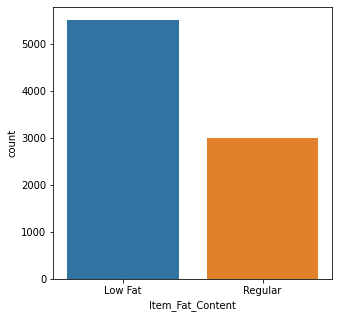

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

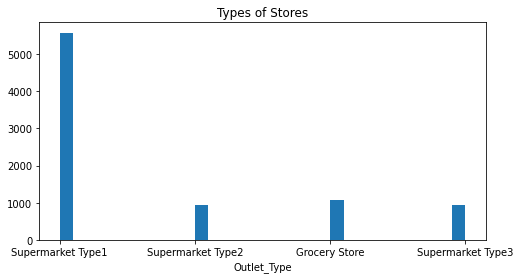

In [ ]:
#Maximum Retail Price Distribution - OOP with ax.set()
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(df['Outlet_Type'],bins=30);
ax.set(xlabel="Outlet_Type", 
       title='Types of Stores');

[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

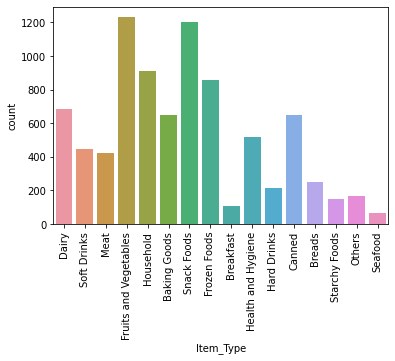

In [ ]:
# displays the various products sold 
labels = list(df['Item_Type'].unique())
chart = sns.countplot(x=df['Item_Type'])
chart.set_xticklabels(labels=labels, rotation=90)

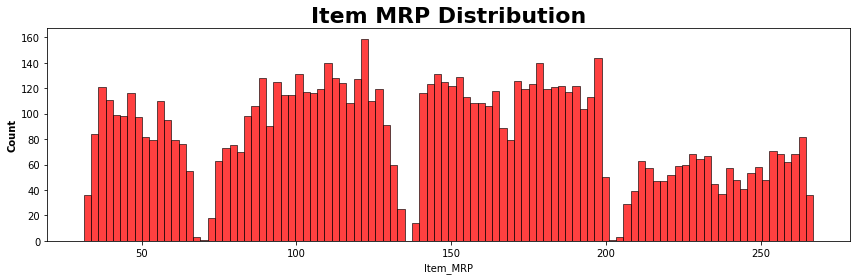

In [ ]:
plt.figure(figsize=(12,4))

sns.histplot(data=df, x='Item_MRP',color='r', bins=100);

plt.title('Item MRP Distribution', fontsize=22,weight='bold')
plt.ylabel('Count', fontsize=10,weight='bold')

plt.tight_layout()
plt.show()


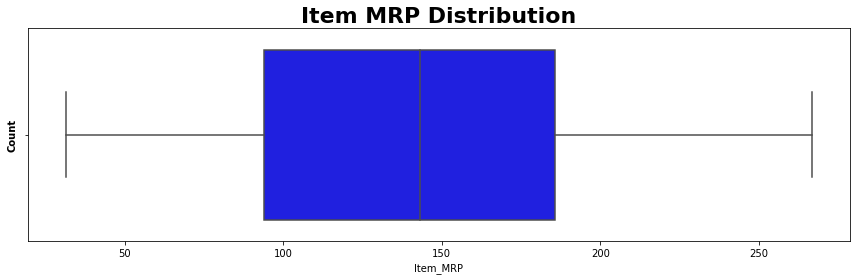

In [ ]:
plt.figure(figsize=(12,4))

sns.boxplot(data=df, x='Item_MRP',color='b');

plt.title('Item MRP Distribution', fontsize=22,weight='bold')
plt.ylabel('Count', fontsize=10,weight='bold')

plt.tight_layout()
plt.show()

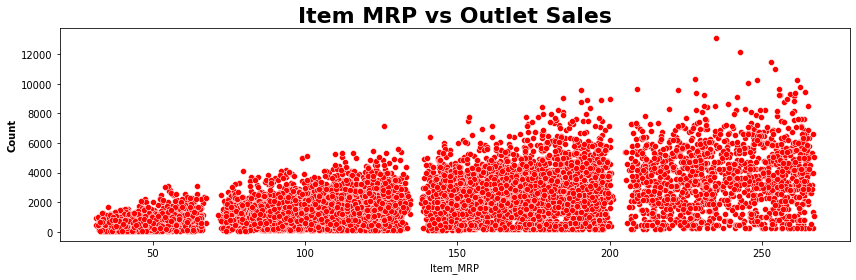

In [ ]:
plt.figure(figsize=(12,4))

sns.scatterplot(data=df, x='Item_MRP',y='Item_Outlet_Sales',color='r')

plt.title('Item MRP vs Outlet Sales', fontsize=22,weight='bold')
plt.ylabel('Count', fontsize=10,weight='bold')

plt.tight_layout()
plt.show()

### **Plot data distribution**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f405017f0>,
      dtype=object)

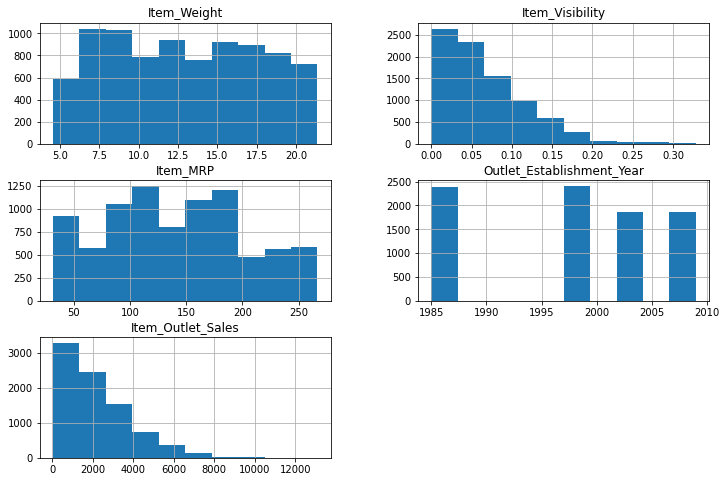

In [ ]:
df.hist(figsize=(12,8))

### **Correlation Heatmap**

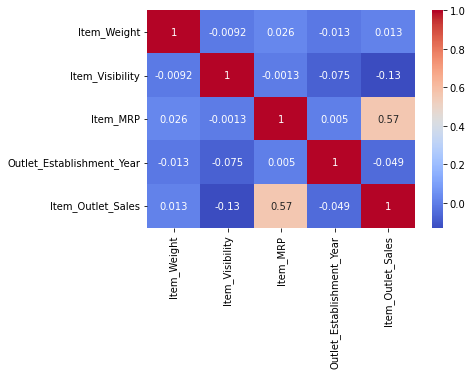

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

**Notes**:
This isn't a clear correlation between item mrp and item outlet sales. Item_MRP is the most essential feature to estimiate the item outlet sales.

## **Data Preprocessing**

#### **Identifying each feature as ordinal, numerical, nominal**
- ordinal features = none
- numeric features = ['Item_Weight','Item_Visibility','Item_MRP']
- nominal features = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Idenfier','Outlet_Location_Type','Outlet_Size','Outlet_Type']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.1+ MB


In [ ]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('object')

In [ ]:
from os import replace
#Using df.replace() to ordinal encode ordinal cat features
#df['Item_Fat_Content'].replace({'Low Fat': 1, 'Regular':0}, inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### **Split the Data**

In [ ]:
## Define features (X) and target (y)
X = df.drop(columns =['Item_Identifier','Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [ ]:
# split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

### **Column Selectors**

In [ ]:
# create a numeric selector
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')


In [ ]:
cat_selector(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [ ]:
train_cat_data = X_train[cat_selector(X_train)]
test_cat_data = X_test[cat_selector(X_test)]

### **Transformers**

In [ ]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')

#scaler
scaler = StandardScaler()
# instantiate one hot encoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)

###**Imputers**

In [ ]:
# Numeric pipeline
numeric_pipe = make_pipeline(median_imputer, scaler)
numeric_pipe



Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
categorical_pipe  = make_pipeline(freq_imputer, ohe)
categorical_pipe 

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
#create tuples
num_tuple = (numeric_pipe,num_selector)
cat_tuple = (categorical_pipe, cat_selector)

###**Column Transformer**

In [ ]:
# instantiate ColumnTransformer
preprocessor = make_column_transformer(num_tuple,cat_tuple,remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f3b66d760>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f3b66d880>)])

In [ ]:
# fit ColumnTransformer on the training data
preprocessor.fit(X_train)                                   

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f3b66d760>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f3b66d880>)])

## **Model the Data**

### **Baseline Model**

In [ ]:
# creating an instance of the model
dummy = DummyRegressor(strategy='mean')

# creating a model pipeline
dummy_pipe = make_pipeline(preprocessor, dummy)

# fitting the model
dummy_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f3b66d760>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f3b66d880>)])),
                ('dummyregressor', DummyRegressor())])

#### **Metrics**

In [ ]:
# Displaying model performance metrics using a function
model_metrics(dummy_pipe,x_train=X_train, y_train=y_train,
                          x_test=X_test, y_test=y_test,
                          model_name='Dummy Model')



Dummy Model Train Scores
MAE: 1,360.2184 
MSE: 2,959,455.7045 
RMSE: 1,720.3069 
R2: 0.0000

Dummy Model Test Scores
MAE: 1,326.1210 
MSE: 2,772,144.4627 
RMSE: 1,664.9758 
R2: -0.0048



###**Linear Regression Model**


In [ ]:
# creating an instance of the model
lin_reg = LinearRegression()

# creating a model pipeline
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)

# fitting the model
lin_reg_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f3b66d760>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f3b66d880>)])),
                ('linearregression', LinearRegression())])

In [ ]:
# Create model pipeline
train_pred = lin_reg_pipe.predict(X_train)
test_pred = lin_reg_pipe.predict(X_test)
test_pred[:10]

array([1363.375,  714.   ,  883.25 , 4235.   , 3338.5  ,  610.5  ,
       4769.5  , 2063.25 , 1403.   , 2816.75 ])

#### **Metrics**

In [ ]:
# Displaying model performance metrics using a function
model_metrics(lin_reg_pipe,x_train=X_train, y_train=y_train,
                          x_test=X_test, y_test=y_test,
                          model_name='Linear Regression')

Linear Regression Train Scores
MAE: 847.1742 
MSE: 1,297,591.6937 
RMSE: 1,139.1188 
R2: 0.5615

Linear Regression Test Scores
MAE: 804.0731 
MSE: 1,194,213.4134 
RMSE: 1,092.8007 
R2: 0.5672



### **Regression Tree Model**

In [ ]:
# creates the regression tree model
dec_tree = DecisionTreeRegressor(random_state=42) 

## Create a model pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)

## Fit the model
dec_tree_pipe.fit(X_train, y_train) 


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f3b66d760>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f3b66d880>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
# predict the target values for the training set and test set
train_preds = dec_tree_pipe.predict(X_train)
test_preds = dec_tree_pipe.predict(X_test)
train_preds[:10]

array([ 515.3292, 3056.022 , 1577.946 , 1331.6   , 1687.1372,  111.8544,
       1151.1682, 3401.5722, 3570.0196, 1523.3504])

In [ ]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
dec_tree.get_depth()

44

In [ ]:
dec_tree.get_n_leaves()

6277

In [ ]:
# Let's run the model with our optimized value for max_depth
dec_tree_9 = DecisionTreeRegressor(max_depth = 9, random_state = 42)
dec_tree_9_pipe = make_pipeline(preprocessor,dec_tree_9)
dec_tree_9_pipe.fit(X_train, y_train)
train_9_score = dec_tree_9_pipe.score(X_train, y_train)
test_9_score = dec_tree_9_pipe.score(X_test, y_test)
print(train_9_score)
print(test_9_score)

0.6645393434830495
0.5437025557569013


In [ ]:
# Displaying model performance metrics using a function
model_metrics(dec_tree_9_pipe,x_train=X_train, y_train=y_train,
                          x_test=X_test, y_test=y_test,
                          model_name='Decision Tree Model')

Decision Tree Model Train Scores
MAE: 685.0491 
MSE: 992,780.9536 
RMSE: 996.3839 
R2: 0.6645

Decision Tree Model Test Scores
MAE: 771.9632 
MSE: 1,258,914.2852 
RMSE: 1,122.0135 
R2: 0.5437



In [ ]:
# List of values to try for max_depth:
depths = list(range(2, 10)) # Will input every value between 2 and 28
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
    dec_tree_pipe.fit(X_train, y_train)
    train_score = dec_tree_pipe.score(X_train, y_train)
    test_score = dec_tree_pipe.score(X_test, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score


Text(0, 0.5, 'R2')

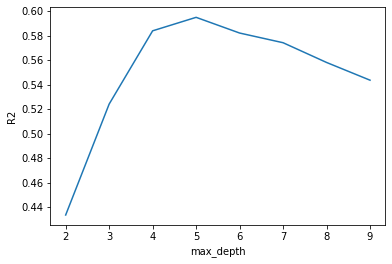

In [ ]:
import matplotlib.pyplot as plt
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2')

In [ ]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head(8)

,Test Score,Train Score
5,0.594954,0.603909
4,0.58396,0.582637
6,0.582158,0.615102
7,0.574256,0.627353
8,0.558168,0.644793
9,0.543703,0.664539
3,0.524222,0.524218
2,0.433778,0.431641


In [ ]:
# Let's run the model with our optimized value for max_depth
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_pipe_5 = make_pipeline(preprocessor, dec_tree_5)
dec_tree_pipe_5.fit(X_train, y_train)
train_5_score = dec_tree_pipe_5.score(X_train, y_train)
test_5_score = dec_tree_pipe_5.score(X_test, y_test)
print(train_5_score)
print(test_5_score)


0.6039092654846363
0.594954272967407


#### **Metrics**

In [ ]:
## Display model performance metrics for decision tree
model_metrics(dec_tree_pipe_5, x_train=X_train, y_train=y_train,
              x_test=X_test, y_test=y_test,
              model_name = "Decision Tree Model")

Decision Tree Model Train Scores
MAE: 762.7664 
MSE: 1,172,212.9838 
RMSE: 1,082.6879 
R2: 0.6039

Decision Tree Model Test Scores
MAE: 738.0201 
MSE: 1,117,511.9614 
RMSE: 1,057.1244 
R2: 0.5950



In [ ]:
# Displaying model performance metrics for the linear regression model again
model_metrics(lin_reg_pipe,x_train=X_train, y_train=y_train,
                          x_test=X_test, y_test=y_test,
                          model_name='Linear Regression')

Linear Regression Train Scores
MAE: 847.1742 
MSE: 1,297,591.6937 
RMSE: 1,139.1188 
R2: 0.5615

Linear Regression Test Scores
MAE: 804.0731 
MSE: 1,194,213.4134 
RMSE: 1,092.8007 
R2: 0.5672



## **Recommendation**

The Decision Tree Model is the one I would use because of the higher R2 score. The R2 for the Decision Tree is 59% for the testing set and 60% for the training set. The RMSE was also lower for the Decision Tree with 1,057.1244. 